#Задание 1
###Импортируйте библиотеки pandas, numpy и matplotlib.
###Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
###Создайте датафреймы X и y из этих данных.
###Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
###Масштабируйте данные с помощью StandardScaler.
###Постройте модель TSNE на тренировочный данных с параметрами:n_components=2, learning_rate=250, random_state=42.
###Постройте диаграмму рассеяния на этих данных.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [68]:
from sklearn.datasets import load_boston

In [69]:
from sklearn.cluster import KMeans

In [70]:
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [71]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [72]:
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ['price'])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [77]:
from sklearn.manifold import TSNE

In [78]:
X_train_tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42).fit_transform(X_train_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [79]:
X_train_tsne.shape

(404, 2)

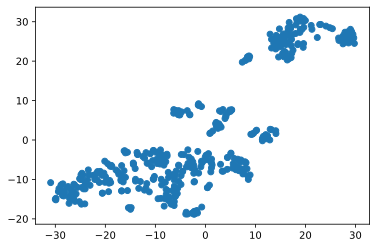

In [80]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

#Задание 2
###С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,используйте все признаки из датафрейма X_train.Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
###Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
###Вычислите средние значения price и CRIM в разных кластерах.


In [81]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, max_iter = 100, random_state =42)
km_train = km.fit_predict(X_train_sc) 

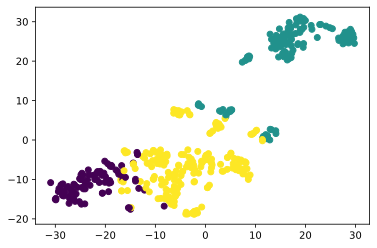

In [82]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = km_train)

In [83]:
print(y_train[km_train == 0].mean())
print(y_train[km_train == 1].mean())
print(y_train[km_train == 2].mean())

price    27.788372
dtype: float64
price    16.165354
dtype: float64
price    24.958115
dtype: float64


In [84]:
print(X_train['CRIM'][km_train == 0].mean())
print(X_train['CRIM'][km_train == 1].mean())
print(X_train['CRIM'][km_train == 2].mean())

0.07356558139534886
10.797028425196853
0.42166020942408367


#*Задание 3
###Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.
###Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.



In [90]:
km_test = km.predict(X_test_sc) 

In [91]:
X_test_sc

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

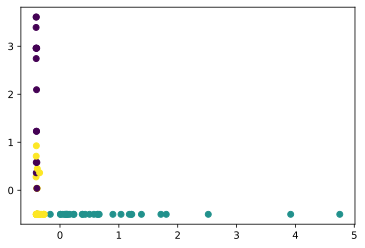

In [92]:
plt.scatter(X_test_sc[:,0], X_test_sc[:,1], c = km_test)

In [93]:
print(y_test[km_test == 0].mean())
print(y_test[km_test == 1].mean())
print(y_test[km_test == 2].mean())

price    31.35
dtype: float64
price    16.437143
dtype: float64
price    21.860784
dtype: float64


In [89]:
print(X_test['CRIM'][km_test == 0].mean())
print(X_test['CRIM'][km_test == 1].mean())
print(X_test['CRIM'][km_test == 2].mean())

0.062060000000000004
10.165531142857143
0.26607882352941176
